# Statistical Distributions

![](images/distributions.png)

# Order of Business:
    
>    1. Describe the difference between discrete vs continuous variables
>    2. Describe the difference between PMFs, PDFs, CDFs
>    3. Introduce the bernouli and binomial distributions
>    4. Introduce the normal distribution and empirical rule

## What is a statistical distribution?

- A statistical distribution is a representation of the frequencies of potential events or the percentage of time each event occurs.

# Activation

![king_county](images/king_county.png)


<p> A probability distribution describes the probability of an event in a sample space.  We recently finished a project investigating opportunity youth in Seattle's King County.  Considering the idea that a distribution can be the probability of any variable, what interesting distributions did you come across?  For example, you most likely looked at the fraction of opportunity youth in South King County vs. youth that fall outside of that category.  The probability that a youth is an opportunity youth, and the corresponding probability that a youth is not an opportunity you, is probability distribution. </p>


#### Group Discussion Answers

\>  



# 1. Discrete vs Continuous

We will learn about a variety of different probability distributions, but before we do so, we need to establish the difference between **discrete** and **continuous** variables.

## Discrete
>  With discrete distributions, the values can only take a finite set of values.  Take, for example, a roll of a single six-sided die. 

![](images/uniform.png)

> - There are 6 possible outcomes of the roll.  In other words, 4.5 cannot be an outcome. As you see on the PMF plot, the bars which represent probability do not touch, suggesting non-integer numbers between 1 and 6 are not possible results.

#### Examples of discrete distributions:

> 1. The Uniform Distribution:- occurs when all possible outcomes are equally likely.
> 2. The Bernoulli Distribution: - represents the probability of success for a certain experiment (binary outcome).
> 3. The Binomial Distribution - represents the probability of observing a specific number of successes (Bernoulli trials) in a specific number of trials.
> 4. The Poisson Distribution:- represents the probability of 𝑛 events in a given time period when the overall rate of occurrence is constant.


## Continuous

With a continous distribution, the set of possible results is an infinite set of values within a range. One way to think about continuous variables are variables that have been measured.  Measurement can always be more precise.

> - A common example is height.  Although we think of height often in values such as 5 feet 7 inches, the exact height of a person can be any value within the range of possible heights.  In other words, a person could be 5 foot 7.000001 inches tall. 
> - Another example is temperature, as shown below:

![](images/pdf.png)

#### Examples of continuous distributions
> 1. Continuous uniform
> 2. The Normal or Gaussian distribution.
> 3. Exponential


The distinction between descrete and continuous is very important to have in your mind, and can easily be seen in plots. 

Let's do a quick exercise. There are two tasks.  

1. First, simply change the color of the plots representing descrete data to orange and the plots represent continous data to blue.
2. Attach the titles to the distributions you think reflect the data set described.

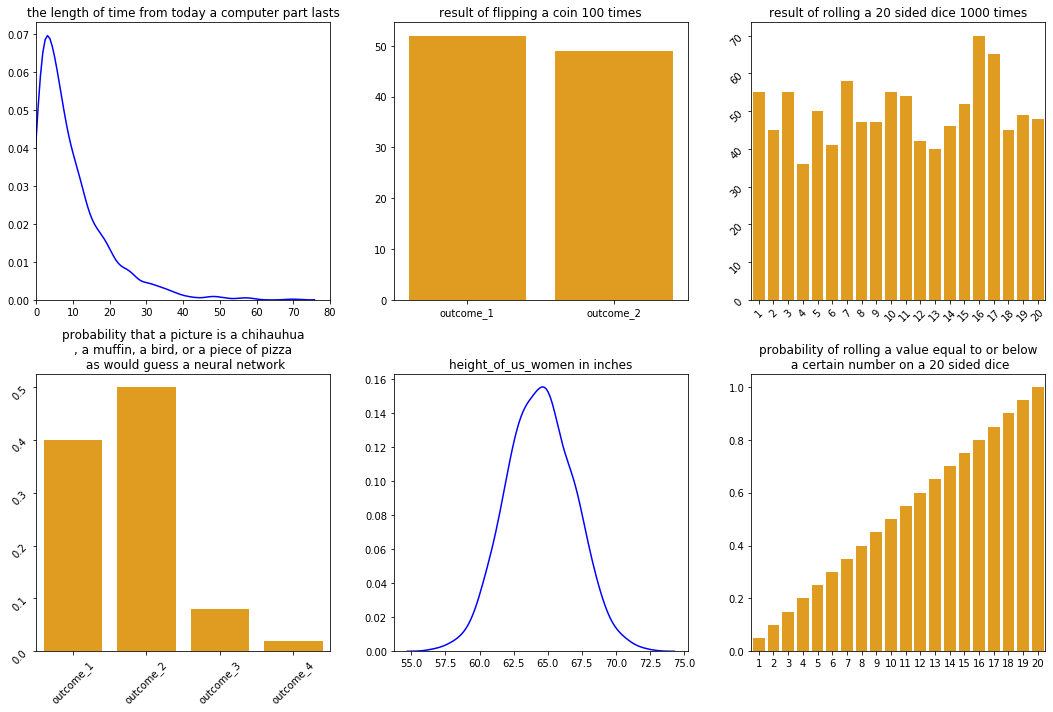

In [4]:
title_1 = "height_of_us_women in inches"
title_2 = 'result of flipping a coin 100 times'
title_3 = 'result of rolling a 20 sided dice 1000 times'
title_4 = 'the length of time from today a computer part lasts'
title_5 = 'probability that a picture is a chihauhua\n, a muffin, a bird, or a piece of pizza\n as would guess a neural network'
title_6 = 'probability of rolling a value equal to or below\n a certain number on a 20 sided dice'
no_title = 'no_title'

fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.kdeplot(np.random.exponential(10, size=1000), ax=ax[0][0], color='blue')
ax[0][0].set_xlim(0,80)
ax[0][0].set_title(title_4)

sns.barplot(['outcome_1', 'outcome_2', 'outcome_3', 'outcome_4'], [.4,.5,.08,.02], ax=ax[1][0], color='orange')
ax[1][0].tick_params(labelrotation=45)
ax[1][0].set_title(title_5)

sns.kdeplot(np.random.normal(64.5, 2.5, 1000), ax=ax[1][1], color='blue')
ax[1][1].set_title(title_1)

sns.barplot(x=['outcome_1','outcome_2'], y=[sum(np.random.binomial(1,.5, 100)),100 - sum(np.random.binomial(1,.5, 100))], ax=ax[0][1], color='orange')
ax[0][1].set_title(title_2)

sns.barplot(x=list(range(1,21)), y=np.unique(np.random.randint(1,21,1000), return_counts=True)[1], ax=ax[0][2], color='orange')
ax[0][2].tick_params(labelrotation=45)
ax[0][2].set_title(title_3)

sns.barplot(list(range(1,21)), np.cumsum([1/20 for number in range(1,21)]), ax=ax[1][2], color='orange')
ax[1][2].set_title(title_6)

plt.tight_layout()


# 2. PMFs, PDFs, and CDFs, oh my!

## PMF: Probability Mass Function


The $\bf{probability\ mass\ function\ (pmf)}$ for a random variable gives, at any value $k$, the probability that the random variable takes the value $k$. Suppose, for example, that I have a jar full of lottery balls containing:
- 50 "1"s,
- 25 "2"s,
- 15 "3"s,
- 10 "4"s

We then represent this function in a plot like so:

### Expected Value/Mean

The expected value, or the mean, describes the 'center' of the distribution (you may hear this called the first moment).  The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution, working from the vantage point of a collected sample of n data points:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

If we are working from the vantage point of known probabilities, the mean is referred to as the expected value. The expected value of a discrete distribution is the weighted sum of all values of x, where the weight is their probability.
 
The expected value of the Lotto example is:
${\displaystyle \operatorname {E} [X]= \Sigma^n_{i=1}p(x_i)x_i}$

# Student input:
Help me calculate the expected value of the lotto example:


In [9]:

expected_value = np.sum(np.array(list(lotto_dict.keys())) 
                        * np.array(list(lotto_dict.values())))
expected_value

1.85

### Variance/Standard Deviation
Variance describes the spread of the data (it is also referred to as the second moment).  The 'spread' refers loosely to how far away the more extreme values are from the center.

Standard deviation is the square root of variance, and effectively measures the *average distance away from the mean*.

From the standpoint of a sample, the variance of a discrete distribution of n data points is:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$


Variance is the expectation of the squared deviation of a random variable from its mean.

For our Lotto PMF, that means:

 $ \Large E((X-\mu)^2) = \sigma^2 = \Sigma^n_{i=1}p(x_i)(x_i - \mu)^2$

# Student input:
Help me calculate the variance for the Lotto Ball example


In [13]:
expected_value = np.sum(np.array(list(lotto_dict.keys())) 
                        * np.array(list(lotto_dict.values())))
variance = np.sum(np.array(list(lotto_dict.values())) 
                  * (np.array(list(lotto_dict.keys()) - np.full(4,expected_value))**2
                                 ))
variance

1.0275

## Uniform Distribution

The uniform distribution describes a set of discrete outcomes whose probabilities are all equally likely.

A common example is the roll of a die.  

![dice](https://media.giphy.com/media/3ohhwLh5dw0i7iLzOg/giphy.gif)

The pmf of a discrete uniform distribution is simply:

$ f(x)=\frac{1}{n} $

Let's take the example of a twelve-sided die, and plot the PMF.  

The probability for rolling any number, is 1/12.

We can also calcalate the mean as follows:  
$\Large E(X)=\frac{a+b}{2}$

Where a is the lowest value and b is the highest. 



Variance can be calculated as follows:

$ \Large\sigma^2=\frac{(b-a+1)^2-1}{12} $

![pear](https://media.giphy.com/media/fBS9UfNnOtkVDqR70I/giphy.gif)

# Short pair programming (2 minutes)
Create the pmf of a 12 sided die

<BarContainer object of 12 artists>

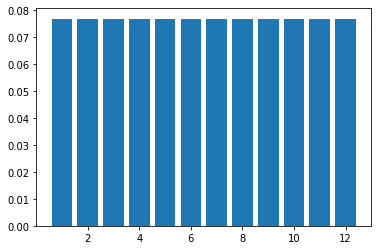

In [44]:
result_set = list(range(1,13))
roll_probabilities = [1/13 for result in result_set]

plt.bar(result_set, roll_probabilities)

## PDF: Probability Density Function
> Probability density functions are similar to PMFs, in that they describe the probability of a result within a range of values.  But where PMFs can be descibed with barplots, PDFs are smooth curves.  

![](images/pdf_temp.png)



We can think of a pdf as a bunch of bars of probabilities getting smaller and smaller until each neighbor is indistinguishable from its neighbor.

It is then intuitive that you cannot calculate expected value and variance in the same way as we did with pmfs.  Instead, be have to integrate over the entirity of the curve to calculate the expected value.

### Expected value and variance for PDFs:
![](images/exp_v_pdf.png)


![](images/pdf_inter.png)

# Describing the PDF

Instead of calculating the mean and standard deviation by hand, we will rather get familiar with how they affect the shape of our PDF.


The mean of our PDF affects where it is centered on the x-axis.  In numpy and stats, mean is denoted by the loc parameter.

The two plots below have the same shape, but different centers.

The variance of our plots describes how closely the points are gathered around the mean.  Low variance means tight and skinny, high variance short and wide.

## Skew 

We will touch briefly on the third and fourth moments for the normal curve. Skew is a measure of assymemtry.  A skew of zero is perfectly symetrical about the mean.   
![skew](images/skew.png)

To add right skew to the data, let's add some outliers to the left of the mean.

To learn about skew, let's take a normal distribution, and add values to skew it.

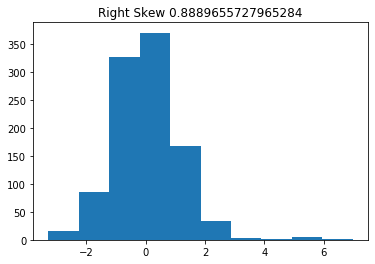

In [176]:
z_curve = np.random.normal(0,1, 1000)
add_right_skew = np.random.choice(np.random.normal(5,1,1000) , 10)
right_skewed_data = np.concatenate([z_curve, add_right_skew])

fig, ax = plt.subplots()
ax.hist(right_skewed_data)
ax.set_title(f"Right Skew {stats.skew(right_skewed_data)}");

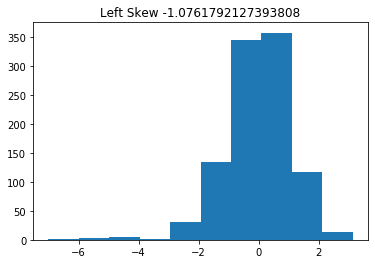

In [177]:
z_curve = np.random.normal(0,1, 1000)
add_left_skew = np.random.choice(np.random.normal(-5,1,1000) , 10)
left_skewed_data = np.concatenate([z_curve, add_left_skew])

fig, ax = plt.subplots()
ax.hist(left_skewed_data)
ax.set_title(f"Left Skew {stats.skew(left_skewed_data)}");

### Transforming  Right/Positively Skewed Data

We may want to transform our skewed data to make it approach symmetry.

Common transformations of this data include 

#### Square root transformation:
Applied to positive values only. Hence, observe the values of column before applying.
Cube root transformation:

#### The cube root transformation: 
involves converting x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data.
Logarithm transformation:

#### The logarithm:
x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.

## Left/Negatively Skewed Data

### Square transformation:
The square, x to x2, has a moderate effect on distribution shape and it could be used to reduce left skewness.
Another method of handling skewness is finding outliers and possibly removing them

## Pair: Report Back the effect of your transformation

Below, we have added some significant right skewed to the data by adding points between 2 and 4 standard deviations to to the right of the mean.

Each group will apply a transformation mentioned about to the data, then report back the new skew.

In [200]:
print(stats.skew(np.log(right_skewed_data)))
print(stats.skew(np.sqrt(right_skewed_data)))
print(stats.skew(right_skewed_data**(1/3)))
print(stats.skew(left_skewed_data**2))

0.015085669510639997
0.21970584419828817
0.15219777277690705
-0.002314263865889254


# Kurtosis

![kurtosis](images/kurtosis.png)


## CDF: Cumulative Distribution Function

![](images/cdf.png)

The cumulative distribution function describes the probability that your result will be of a value equal to or below a certain value. It can apply to both discrete or continuous functions.

For the scenario above, the CDF would describe the probability of drawing a ball equal to or below a certain number.  

In order to create the CDF from a sample, we:
- align the values from least to greatest
- for each value, count the number of values that are less than or equal to the current value
- divide that count by the total number of values

The CDF of the Lotto example plots how likely we are to get a ball less than or equal to a given example. 

Let's create the CDF for our Lotto example


# Pair Program
Taking what we know about cumulative distribution functions, create a plot of the CDF of a fair 12-sided die.

Take this in steps (no pun intended).
1. Create a list of possible rolls. 
2. Multiply the probability of each roll by the value of the roll.
3. Record the cumulative sum of each roll (hint: try np.cumsum()

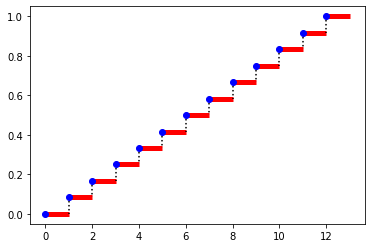

In [203]:
fig, ax = plt.subplots()
rolls = list(range(0,13))
cumu_probs = np.cumsum([1/12 for number in range(1,13)])

cumu_probs = np.insert(cumu_probs,0,0,axis=0)
ax.plot(rolls, cumu_probs, 'bo', color='blue')
# ax.vlines(rolls, 0, cumu_probs, 'r', lw=5)
for i in range(0,13):
    ax.hlines(cumu_probs[i], i,i+1, 'r', lw=5,)
for i in range(0,12):
    ax.vlines(i+1, cumu_probs[i+1],cumu_probs[i],  linestyles='dotted')

- For continuous random variables, obtaining probabilities for observing a specific outcome is not possible 
- Have to be careful with interpretation in PDF

We can, however, use the CDF to learn the probability that a variable will be less than or equal to a given value.



Consider the following normal distributions of heights (more on the normal distribution below).

The PDF and the CDF look like so:


If we provide numpy with the underlying parameters of our distribution, we can calculate: 


We can also calculate the value associated with a specfic percentile:

And from there, the value of ranges, such as the interquartile range:

# 3. Bernouli and Binomial Distributions

In our work as data scientists, we will often come across scenarios which our results can be categorized as failure or success (0 or 1). The simplest example is, once again, a coin flip.  In this scenario, we define either heads or tails as a "success", and assume, if the coin is fair, the probability of success to be .5

![](images/bernouli.png)

## Binomial

The Binomial distribution describes the number of successess of a set of bernouli trials. For example, if we flipped a coin 10 times, how many times would it land on heads.  We would expect to see the 5 heads.  

- If we repeat this process multiple times
- n independent Bernoulli trials

- Eg:
> - 𝑃(𝑌=0) (or the soccer player doesn't score a single time)? 
> - 𝑃(𝑌=1) (or the soccer player scores exactly once)? 
> - 𝑃(𝑌=2) (or the soccer player scores exactly twice)? 
> - 𝑃(𝑌=3) (or the soccer player scores exactly three times)?

![](images/binomial.png)

- Expected Value
> $E(X) = np$ <br>
- Variance
> $Var(X) = np(1-p)$<br>

- If we want to see the probability of a certain number of successes, we use the pmf.
> $pmf = {n \choose k}*p^k*(1-p)^{n-k}$


# 4. Normal Distribution

The last distribution we will cover today is the normal distribution. You probably recognize its distinctive bell curve.  It is the most important distribution for our purposes in this course and will reappear often in machine learning.

![](images/normal.png)

![](images/normal_2.png)

The standard normal distribution, or z curve, is centered around 0 with a standard deviation of 1.  

![](images/empirical_rule.png)

## Empirical Rule
> The empirical or 68–95–99.7 states that 68% of the values of a normal distribution of data lie within 1 standard deviation of the mean, 95% within 2 stds, and 99.7 within three.  
> The empirical rule has countless applications in data science, which we will expand upon in the next few lectures.